In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models


inicialmente a imagem original é lida pela máquina como uma matriz(kernel), essa imagem passsa após aplicar filtros, que tem uma matriz definida para cada filtro, gera uma nova imagem resultante da multiplicação da matriz inical e matriz do filtro 

<img src="../imagens/filtro.png" alt="matrizes" width="500">




um exemplo de como funciona visualmente: 

<img src="../Captura de tela 2025-01-25 154517.png" alt="matrizes" width="500">

aplicação da camada relu, essa camada tende entre 0 e 1, então ela vai pegar a matriz e normalizar os valores dentro desse intervalo.

<img src="../imagens/relu.png" alt="" width="500">

entramos na camada de pooling, com ideia de reduzir o problema, focando apenas nas caracteristicas mais importantes e diminuindo o kernel,
o maxPooling tenta reduzir a matriz da imagem para gerar uma versao mais otimizada

<img src="../imagens/maxPooling.png" alt="" width="500">
<img src="../imagens/Captura de tela 2025-01-25 154816.png" alt="" width="500">

Escopo do processo como um todo.

<img src="../imagens/escopo.png" alt="" width="500">

In [25]:
# criando model, para cada camada criada, voce diminui mais o kernel
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',
     input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(), #"achata" os dados de entrada 
    tf.keras.layers.Dense(128, activation='relu'), # conecta cada 128 neuronios aos anteriores, para aprender caracteristicas
    tf.keras.layers.Dense(10, activation='softmax') # gera probabilidade para cada classe(10),  a classe de maior probabilidade será a previsão
])
model.summary() #resumo do modelo gerado (evolução da diminuição de kernel e achatamento )

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Testando modelo criado com camadas de covolução

In [15]:
from keras.api.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras import callbacks
import numpy as np


In [17]:
(train_image ,train_labels), (test_image, test_labels) = fashion_mnist.load_data() # carregando conjunto de train e test do dataset fashion

print('conjunto de treino image x labels:', train_image.shape, train_labels.shape)
print('conjunto de test image x labels:', test_image.shape, test_labels.shape)
classe_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

conjunto de treino image x labels: (60000, 28, 28) (60000,)
conjunto de test image x labels: (10000, 28, 28) (10000,)


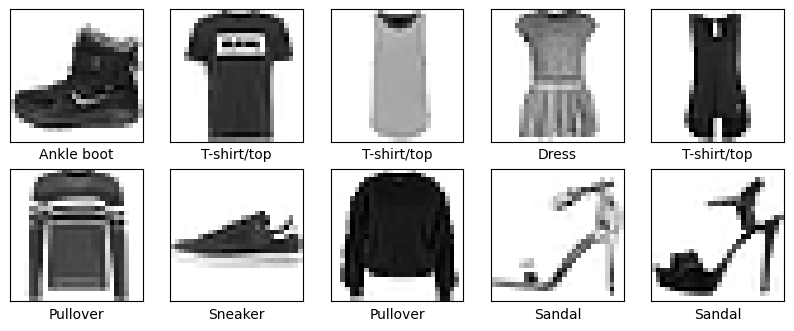

In [18]:
# Normalizar os dados
train_image = train_image / 255.0
test_image = test_image / 255.0

# Visualizar as primeiras 10 imagens
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) 
    plt.yticks([])  
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)  # Exibe cada imagem
    plt.xlabel(classe_names[train_labels[i]])  # Mostra o rótulo correspondente
plt.show()

In [38]:
# callback definido para encerrar o treinamento, caso o loss(taxa de perda) seja inferior a 0.3, para garantir boa acuracia e evitar overfitting
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.3):
            print(" {loss é baixo cancelando treino}")
            self.model.stop_training = True

In [39]:
callbacks = MyCallback()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_image, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9694 - loss: 0.0816 {loss é baixo cancelando treino}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9694 - loss: 0.0816
